<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/Telecom_Churn_EDA_Sathyabama_10Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Module IT105 project - Telecom Churn Prediction
###Name : Sathyabama
#### Student id: 9205504F


## Project Overview
The objective is to predict customer churn in a telecommunications company. Customer churn refers to customer leaving the telecommunications. In the longe run, loosing customers  significantly impact a company's revenue. By predicting which customers are likely to churn, the company can take proactive measures to retain them.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataframe
df = pd.read_csv("/content/drive/MyDrive/dataset/Copy of telcom_churn_large.csv")

## Exploratory Data Analysis

### 1. Structure Investigation
#####Exploring the general shape of the dataset, as well as the data types of features.

In [ ]:
# Show the dimensions of the dataframe
df.shape

(100000, 33)

In [ ]:
# Count the instances of dtypes appearing in the dataset
df.dtypes.value_counts()

object     23
int64       6
float64     4
Name: count, dtype: int64

Dataset contains 100000 rows and 33 columns (featues) and datatypes for 23 features are of object, 6 features are of integers and 4 features are of float.

In [ ]:
# Visualise non-numeric features
df.select_dtypes(exclude="number").head()

CustomerID        Country       State              City  \
0  7774-OJSXI  United States  California  South Lake Tahoe   
1  2878-DHMIN  United States  California        Sacramento   
2  4804-NCPET  United States  California         Clearlake   
3  5006-MXVRN  United States  California             Keyes   
4  8216-AZUUZ  United States  California     San Francisco   

                 Lat Long  Gender Senior Citizen Partner Dependents  \
0  38.911577, -120.106169    Male             No      No         No   
1  38.619049, -121.517552    Male             No     Yes        Yes   
2  38.965804, -122.631779    Male             No     Yes        Yes   
3  37.555631, -120.911653  Female             No      No         No   
4  37.781304, -122.461522  Female             No     Yes        Yes   

  Phone Service  ...        Online Backup    Device Protection  \
0           Yes  ...                  Yes                  Yes   
1           Yes  ...  No internet service  No internet service   
2           Yes  ...  No internet service  No internet service   
3           Yes  ...  No internet service  No internet service   
4           Yes  ...                   No                  Yes   

          Tech Support         Streaming TV     Streaming Movies  Contract  \
0                   No                  Yes                  Yes  One year   
1  No internet service  No internet service  No internet service  One year   
2  No internet service  No internet service  No internet service  Two year   
3  No internet service  No internet service  No internet service  Two year   
4                  Yes                  Yes                  Yes  Two year   

  Paperless Billing           Payment Method Churn Label  \
0               Yes         Electronic check         Yes   
1                No         Electronic check          No   
2                No             Mailed check          No   
3                No  Credit card (automatic)          No   
4               Yes         Electronic check          No   

                      Churn Reason  
0  Poor expertise of phone support  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  

[5 rows x 23 columns]

The feature value and data type matches for the non-numerical data

In [ ]:
# Check how many unique values each of the non-numerical features has and identify highest frequency of the top value of the feature
df.describe(exclude="number")

CustomerID        Country       State         City  \
count       100000          98003      100000       100000   
unique        7043              1           1         1129   
top     2530-FMFXO  United States  California  Los Angeles   
freq            41          98003      100000         4372   

                      Lat Long Gender Senior Citizen Partner Dependents  \
count                   100000  95131          95288  100000     100000   
unique                    1652      3              3       2          2   
top     33.720359, -117.733655   Male             No      No         No   
freq                       100  46795          78283   51520      76868   

       Phone Service  ... Online Backup Device Protection Tech Support  \
count         100000  ...        100000            100000       100000   
unique             2  ...             3                 3            3   
top              Yes  ...            No                No           No   
freq           90423  ...         43851             43782        49350   

       Streaming TV Streaming Movies        Contract Paperless Billing  \
count        100000           100000          100000            100000   
unique            3                3               3                 2   
top              No               No  Month-to-month               Yes   
freq          39848            39629           54867             59320   

          Payment Method Churn Label                Churn Reason  
count             100000      100000                       26555  
unique                 4           2                          20  
top     Electronic check          No  Attitude of support person  
freq               33846       73445                        2765  

[4 rows x 23 columns]

In [ ]:
#Check the struture of the numerical features
df.select_dtypes(include="number").head()

Count  Zip Code   Latitude   Longitude  Tenure Months  Monthly Charges  \
0      1     96150  38.911577 -120.106169             31       101.949447   
1      1     95833  38.619049 -121.517552             35        21.044041   
2      1     95422  38.965804 -122.631779             19        16.683919   
3      1     95328  37.555631 -120.911653             39        20.999046   
4      1     94118  37.781304 -122.461522             42       106.860101   

   Total Charges  Churn Value  Churn Score  CLTV  
0    3061.394940            1           65  5387  
1     645.199178            0           30  2334  
2     366.686109            0           60  4821  
3     778.858402            0           45  3733  
4    4308.035884            0           76  3265

In [ ]:
# Get Unique count for for numerical data  in the dataset
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Convert the Series to a DataFrame for better readability
unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Feature', 'Unique Values']

# Display the DataFrame as a table
print(unique_values_df)

           Feature  Unique Values
0            Count              1
1      Churn Value              2
2    Tenure Months             73
3      Churn Score             85
4        Longitude           1651
5         Zip Code           1652
6         Latitude           1652
7             CLTV           3438
8    Total Charges           7032
9  Monthly Charges           7043


### 2. Quality Investigation

The aim is to have overall view on the dataset with regard to quality of data like duplicates, missing values and unwanted entries or recording errors

In [ ]:
# Checking for duplicates in data, except Customer ID, same customer could have set up twice?
n_duplicates = df.drop(labels=["CustomerID"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 92957 duplicates in your database.


In [ ]:
#  Extract column names of all features, except 'CustomerID'
columns_to_consider = df.drop(labels=["CustomerID"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(7043, 33)

Duplicates Removed .  Use the dataset with 7043 rows this point forward

In [ ]:
df.describe(exclude="number")

CustomerID        Country       State         City  \
count         7043           6903        7043         7043   
unique        7043              1           1         1129   
top     7774-OJSXI  United States  California  Los Angeles   
freq             1           6903        7043          305   

                     Lat Long Gender Senior Citizen Partner Dependents  \
count                    7043   6708           6709    7043       7043   
unique                   1652      3              3       2          2   
top     32.68674, -117.186612   Male             No      No         No   
freq                        5   3293           5507    3641       5416   

       Phone Service  ... Online Backup Device Protection Tech Support  \
count           7043  ...          7043              7043         7043   
unique             2  ...             3                 3            3   
top              Yes  ...            No                No           No   
freq            6361  ...          3088              3095         3473   

       Streaming TV Streaming Movies        Contract Paperless Billing  \
count          7043             7043            7043              7043   
unique            3                3               3                 2   
top              No               No  Month-to-month               Yes   
freq           2810             2785            3875              4171   

          Payment Method Churn Label                Churn Reason  
count               7043        7043                        1869  
unique                 4           2                          20  
top     Electronic check          No  Attitude of support person  
freq                2365        5174                         192  

[4 rows x 23 columns]

In [ ]:
print(df.keys())

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [ ]:
# Get Unique count for for non-numerical data  in the dataset
unique_values_non_numeric = df.select_dtypes(exclude="number").nunique().sort_values()

# Convert the Series to a DataFrame for better readability
unique_values_non_numeric_df = unique_values_non_numeric.reset_index()
unique_values_non_numeric_df.columns = ['Feature', 'Unique Values']

# Display the DataFrame as a table
print(unique_values_non_numeric_df)

In [ ]:
missing_count = df.isnull().sum()
# Filter to get only columns with non-zero missing values
non_zero_missing = missing_count[missing_count > 0]
print(non_zero_missing)

Country            140
Gender             335
Senior Citizen     334
Total Charges       11
Churn Reason      5174
dtype: int64


In [ ]:
# Get the missing values
import missingno as msno

fig, ax = plt.subplots(figsize=(14, 5))
ax.set_title('Missing Data Matrix', fontsize=16,color="blue")
msno.matrix(df, labels=True, sort="descending",fontsize=10, ax=ax)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 75704
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            6903 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             6708 non-null   object 
 10  Senior Citizen     6709 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 non-

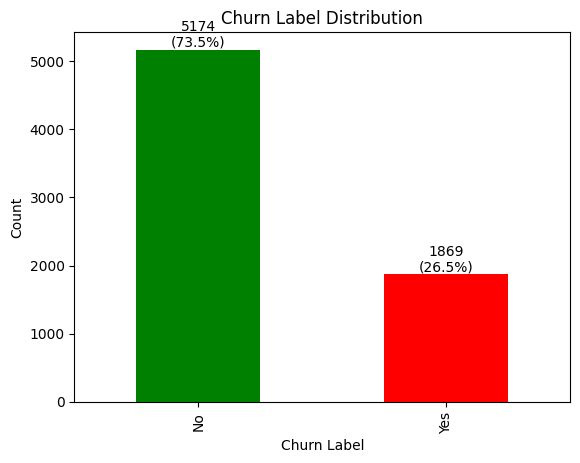

In [ ]:
# checking how much of data is related to the problem statement - Target data
counts = df['Churn Label'].value_counts()
percentages = df['Churn Label'].value_counts(normalize=True) * 100
ax = counts.plot(kind='bar', color=['green', 'red'])

# Annotate the bars with counts and percentages
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 0.1, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Churn Label Distribution')
plt.show()

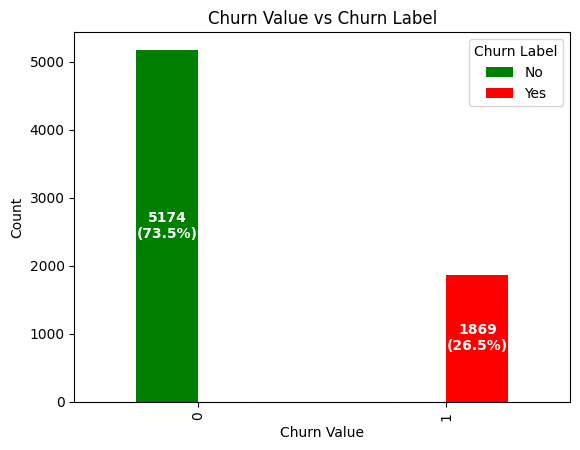

In [ ]:
## Observe and ensure through visual Chaurn Value and Churn label are same before dropping

# Create a crosstab to show the relationship between Churn Value and Churn Label
crosstab = pd.crosstab(df['Churn Value'], df['Churn Label'])

# Plot the crosstab
ax = crosstab.plot(kind='bar',color=['green', 'red'])
plt.title('Churn Value vs Churn Label')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.legend(title='Churn Label')

# Annotate with counts and percentages
total = crosstab.values.sum()
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center', color='white', weight='bold')

plt.show()

#### Intervention to deal with missing, duplicate and redundant features/values before further analysis

Majority of features in the dataset is object values and the datatypes and values matches. Churn value is binary , but many features, though have binary value, they are represented as Yes or No.


#### Rationale
- There appear to be a substantial number of missing values in columns like count, country, which have been shown to be questionable features in structural analysis (eg.only one value)

- Thus, intervening now to drop these columns will allow us to preserve as many examples as possible when we choose to drop rows with missing values.

#### Target Vector
- churn label -> shows a binary yes/no value for our task, whether the customer churns or not.  

- Churn value appear to contain the same information as churn label, as such, will be dropped

#### Duplicate values
Upon investigation of the data, with assumption that the customer id might be unique, the same customer might have joined multiple times to the telco as there is no time period given in the dataset.  it is observerd there are lot of duplicates and the result is only 7043 rows unique.

#### Columns that appear redundant:
- lat long(just latitude and longitude put together, features which are present separately , thus will be dropped)

- country, state -> the only value is california, which is in the US, will be dropped as it does not add merit to analysis

-customerid -> appears to be a unique id that does not correlate with target vector, does not provide information useful for analysis

-zip code -> is not accurate at representing location on a numerical scale, and is inferior to the latitude and logitude features in this regard, thus will be dropped

#### Missing Values

values are notably missing from:
- country(fine because the feature will be dropped as the dataset is only from Uunited States)

- senior citizen (will drop missing data)
  - very important factor in churn
  - number of missing values are not substantial ~5%

- gender (will drop missing data)
  - potentially important
  - number of missing values are not substantial ~5%

- total charges (will drop missing data)
  - highly important for churn status
  - number of rows with missing values is negligible

In [ ]:
# Drop the features Country, State, CustomerID, Lat Long , Zip Code, Churn Value
df.drop(['Country', 'State', 'CustomerID','Lat Long','Zip Code', 'Churn Value','Count'], axis = 1 , inplace = True)

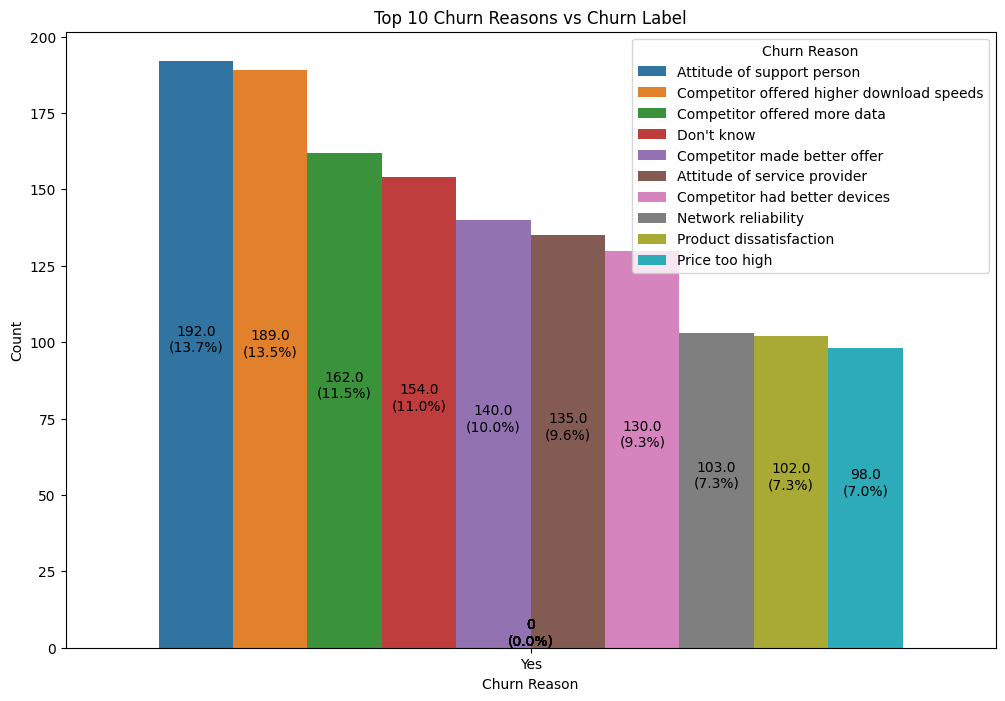

In [ ]:
#check for Churn Reason pattern and see if you get any insights on the reason for Churn  like telco services quality or charges or complaints by the customer

# Get the top 10 churn reasons
top_reasons = df['Churn Reason'].value_counts().nlargest(10).index
filtered_df = df[df['Churn Reason'].isin(top_reasons)]

# Sort the filtered DataFrame by the count of each churn reason
sorted_df = filtered_df.groupby('Churn Reason').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
sorted_df = sorted_df.merge(filtered_df, on='Churn Reason', how='left')

# Count plot for top 10 churn reasons
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Churn Label', hue='Churn Reason', data=sorted_df)
plt.title('Top 10 Churn Reasons vs Churn Label')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.legend(title='Churn Reason')


# Annotate with counts and percentages
total = len(filtered_df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom')

plt.show()

In [ ]:
# Drop the features Country, State, CustomerID, Lat Long , Zip Code, Churn Reason, Churn Value
#df.drop(['Country', 'State', 'CustomerID','Lat Long','Zip Code', 'Churn Reason','Churn Value','Count'], axis = 1 , inplace = True)

In [ ]:
df.drop(['Churn Reason'], axis = 1 , inplace = True)

In [ ]:
# Check columnsd
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 75704
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             6708 non-null   object 
 4   Senior Citizen     6709 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 non-

In [ ]:
#Dropping missing values as the missing value are not significant
df = df.dropna()

In [ ]:
df.describe()

Latitude    Longitude  Tenure Months  Monthly Charges  \
count  6387.000000  6387.000000    6387.000000      6387.000000   
mean     36.274805  -119.793264      32.471270        70.449484   
std       2.459772     2.158232      24.501364        69.536402   
min      32.555828  -124.301372       1.000000         2.245156   
25%      34.028331  -121.805845       9.000000        36.919870   
50%      36.319181  -119.726936      29.000000        71.201022   
75%      38.208336  -118.038307      55.000000        90.696324   
max      41.962127  -114.192901      72.000000      1117.904581   

       Total Charges  Churn Score         CLTV  
count    6387.000000  6387.000000  6387.000000  
mean     2528.538329    58.737279  4396.638171  
std      4135.548155    21.468770  1183.127253  
min        -2.759953     5.000000  2003.000000  
25%       412.976069    41.000000  3462.500000  
50%      1422.986490    61.000000  4528.000000  
75%      3874.600274    75.000000  5379.000000  
max     84264.101411   100.000000  6500.000000

In [ ]:
### to view the distribution . but this can be viewed through Scatterplot and box plot as well
#df.plot(lw=0, marker=".", subplots=True, layout=(-1, 7),
#          figsize=(20, 20), markersize=1)

#### Get a visual idea of the entire dataset for categorical values (how many discrete values are present)

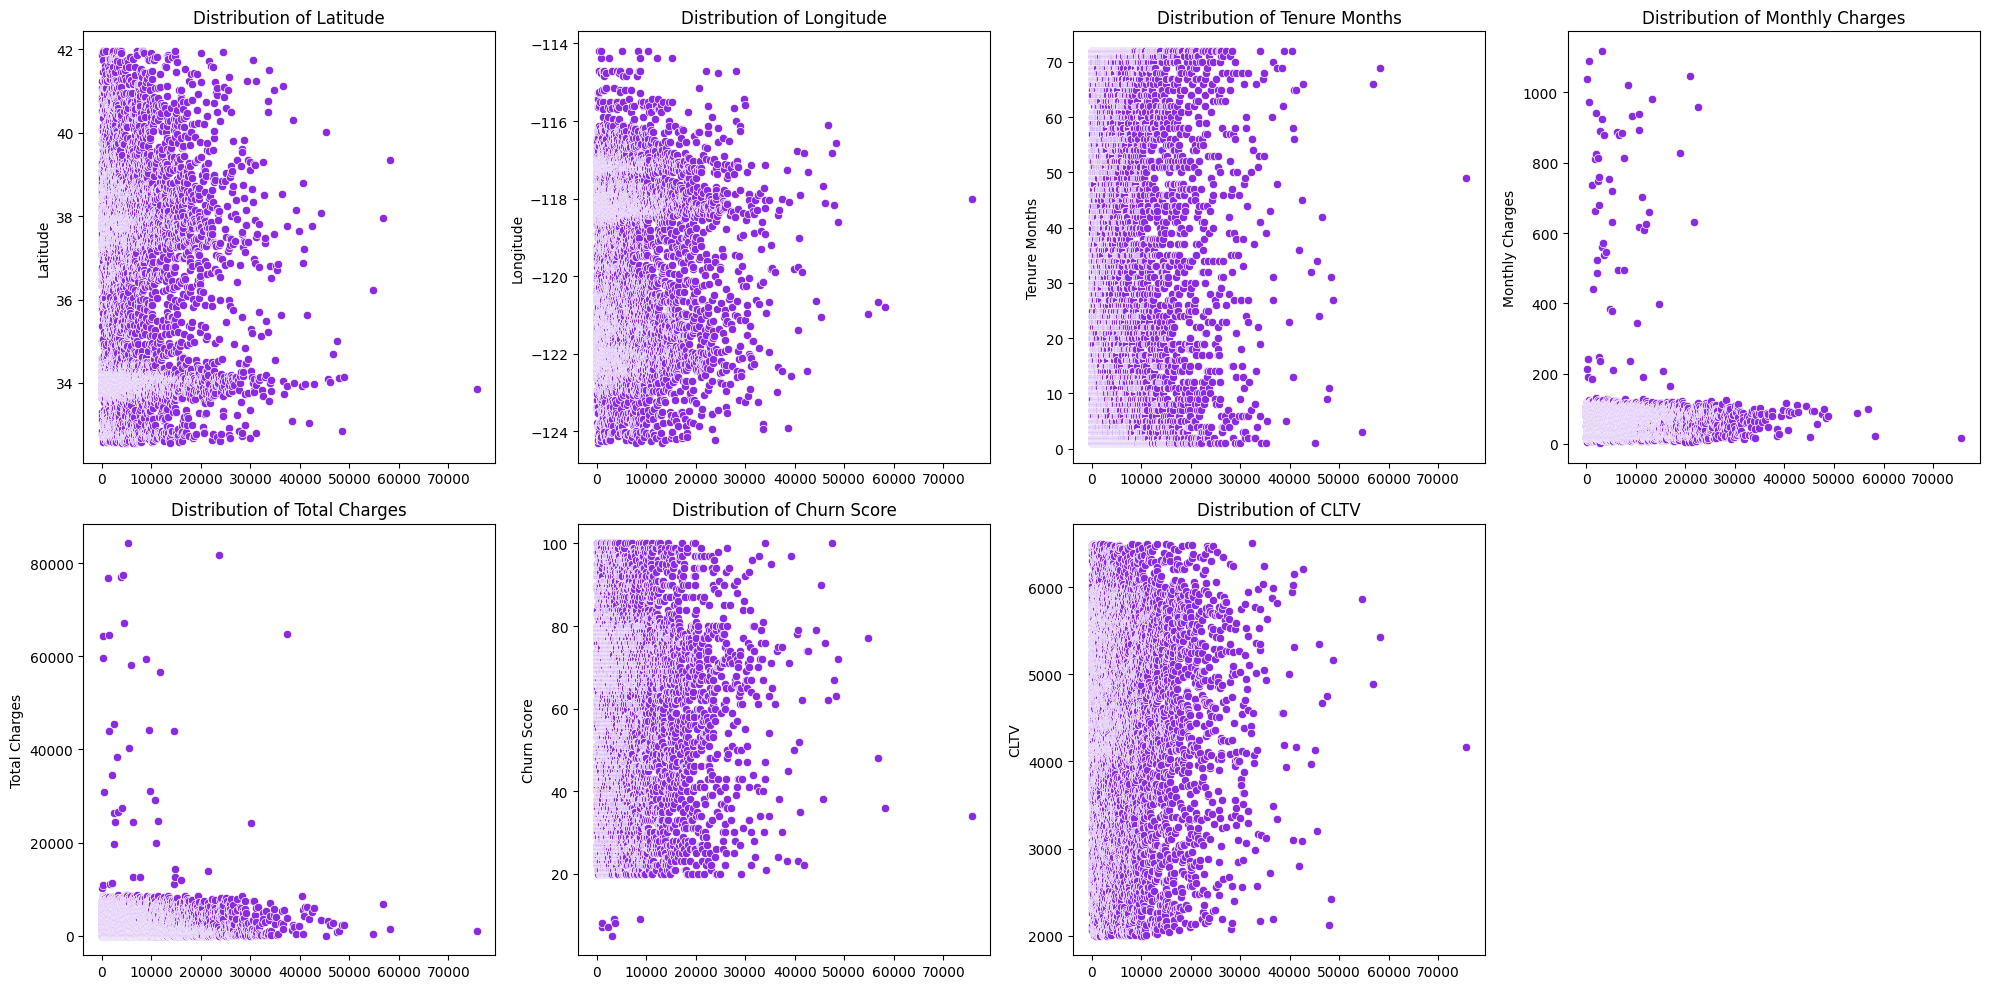

In [ ]:
#Get the list of all numeric columns and view through Scattter plot to observe the distribution
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.scatterplot(df[col], ax=axes[i],color="blueviolet")
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

My observation from the above is that the feature values are not discrete rather they are continuous

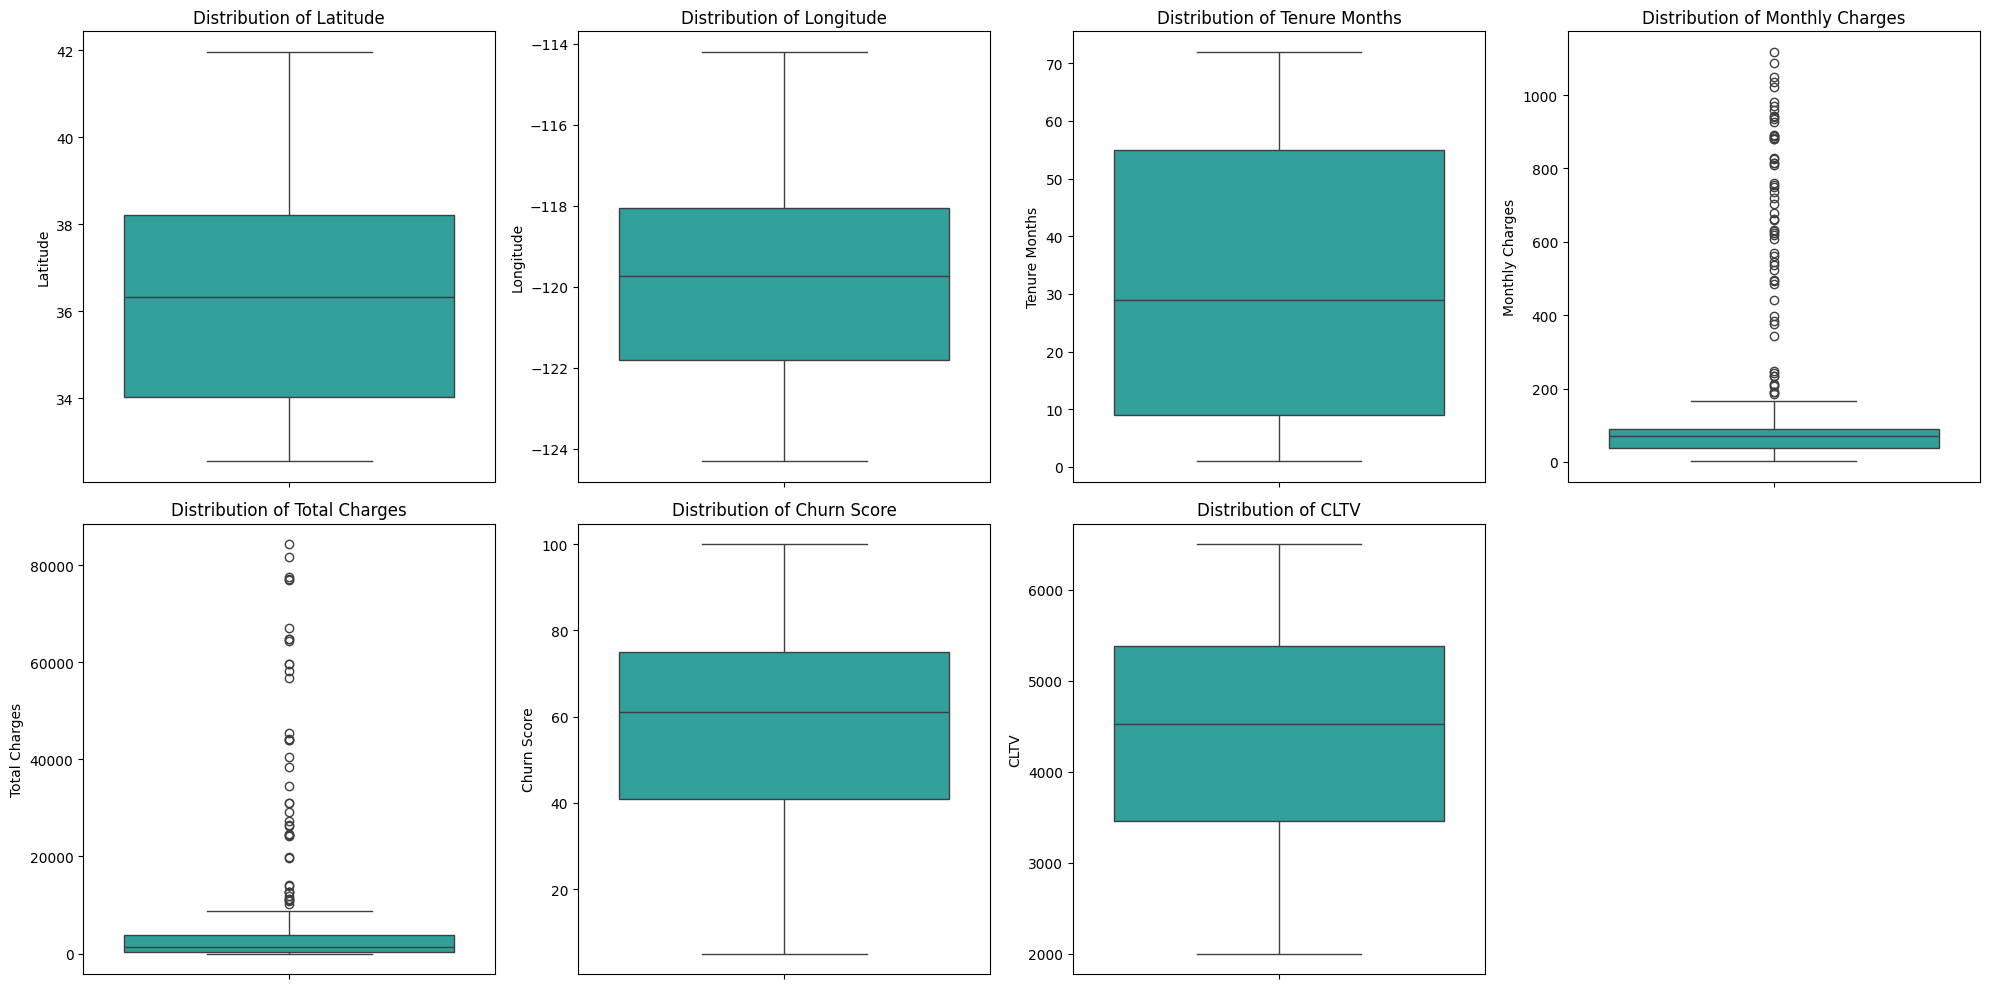

In [ ]:
# Next i want to visualize the distribution, spread, and potential outliers of numerical data in my dataset
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.boxplot(df[col], ax=axes[i],color="lightseagreen")
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

My observation is that there are outliers in the Total charges and monthly charges , but i am not excluding now until i see the model performance

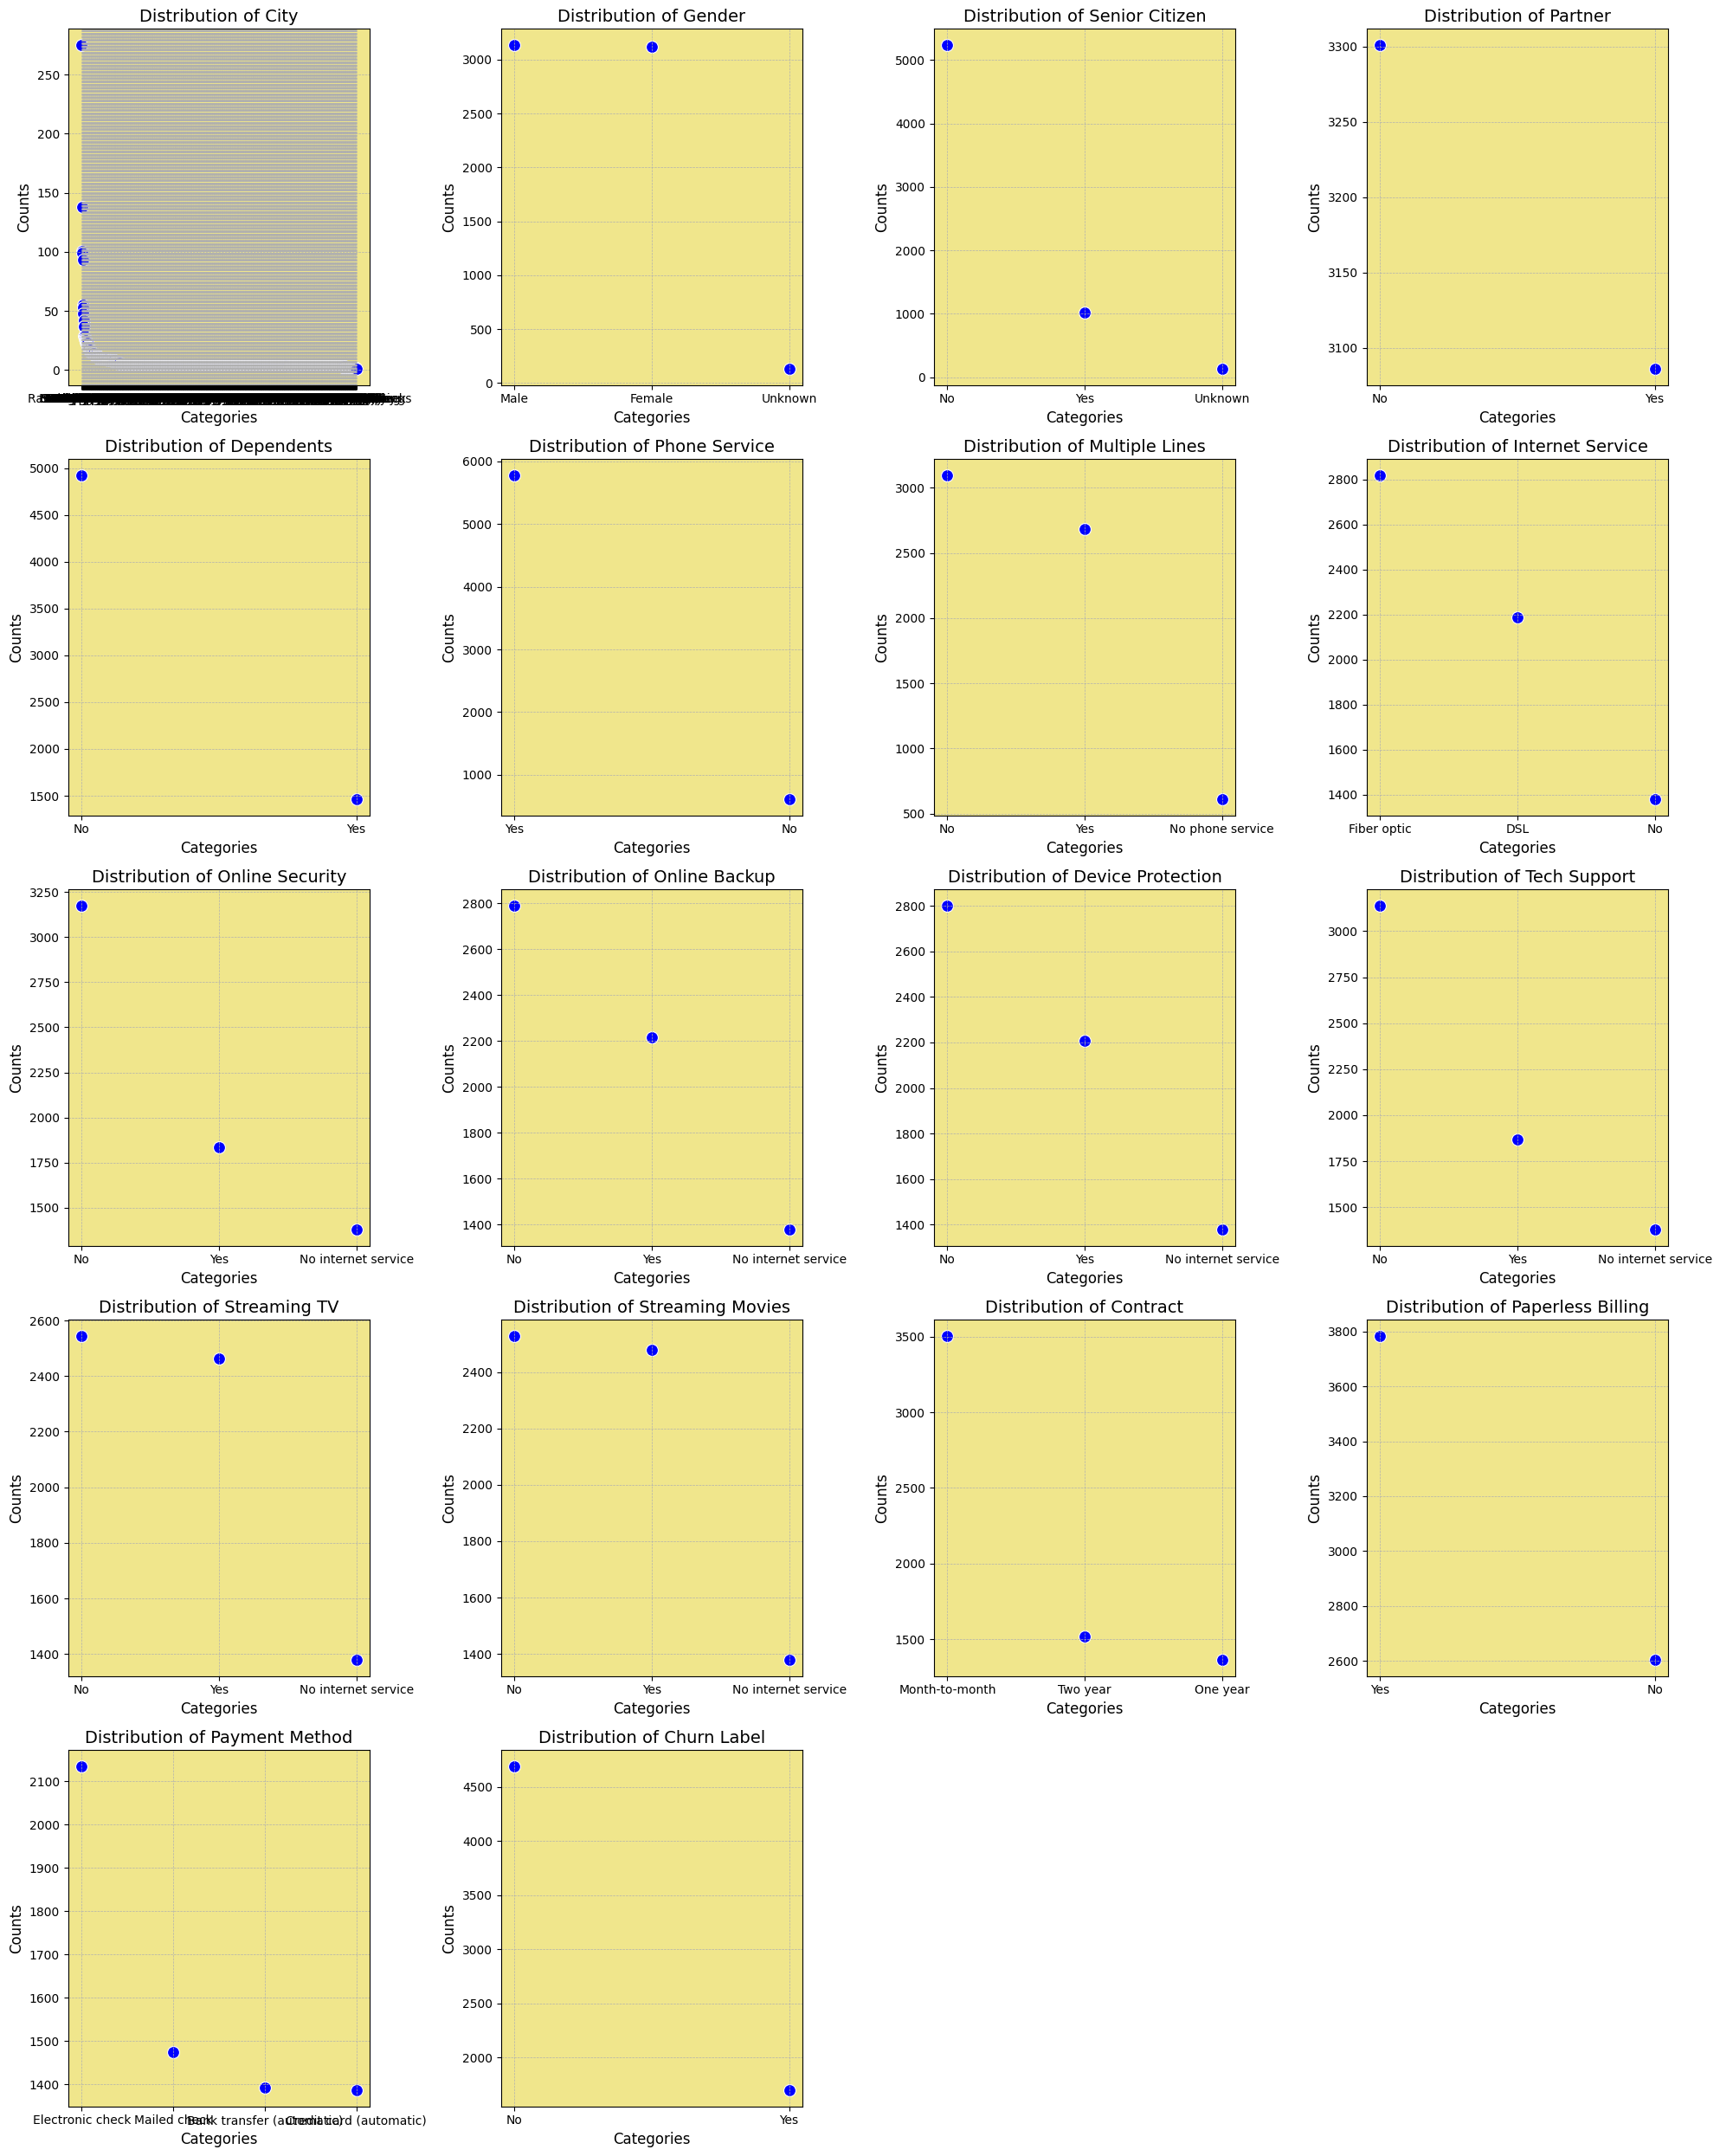

In [ ]:
#Get the list of all categorical  columns - to view visualize the distribution of categorical variable

# Get the list of all categorical columns
cat_list = [i for i in df.columns if df[i].dtype == 'object']

num_plots = len(cat_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot Categorical variables with customizations
for i, col in enumerate(cat_list):
    sns.scatterplot(df[col].value_counts(), ax=axes[i], marker='o', s=100, color='blue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Categories', fontsize=12)
    axes[i].set_ylabel('Counts', fontsize=12)
    axes[i].grid(True, linestyle='--', linewidth=0.5)
    axes[i].set_facecolor('khaki')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

My observation is that categorical values are discrete and may of them as Yes, No , which intriques me to look at look relatioship of each other with Churn Label

## 3. Content Investigation

#### Univariate Analysis

Feature Distribution - Analysing each variable on its own distribution

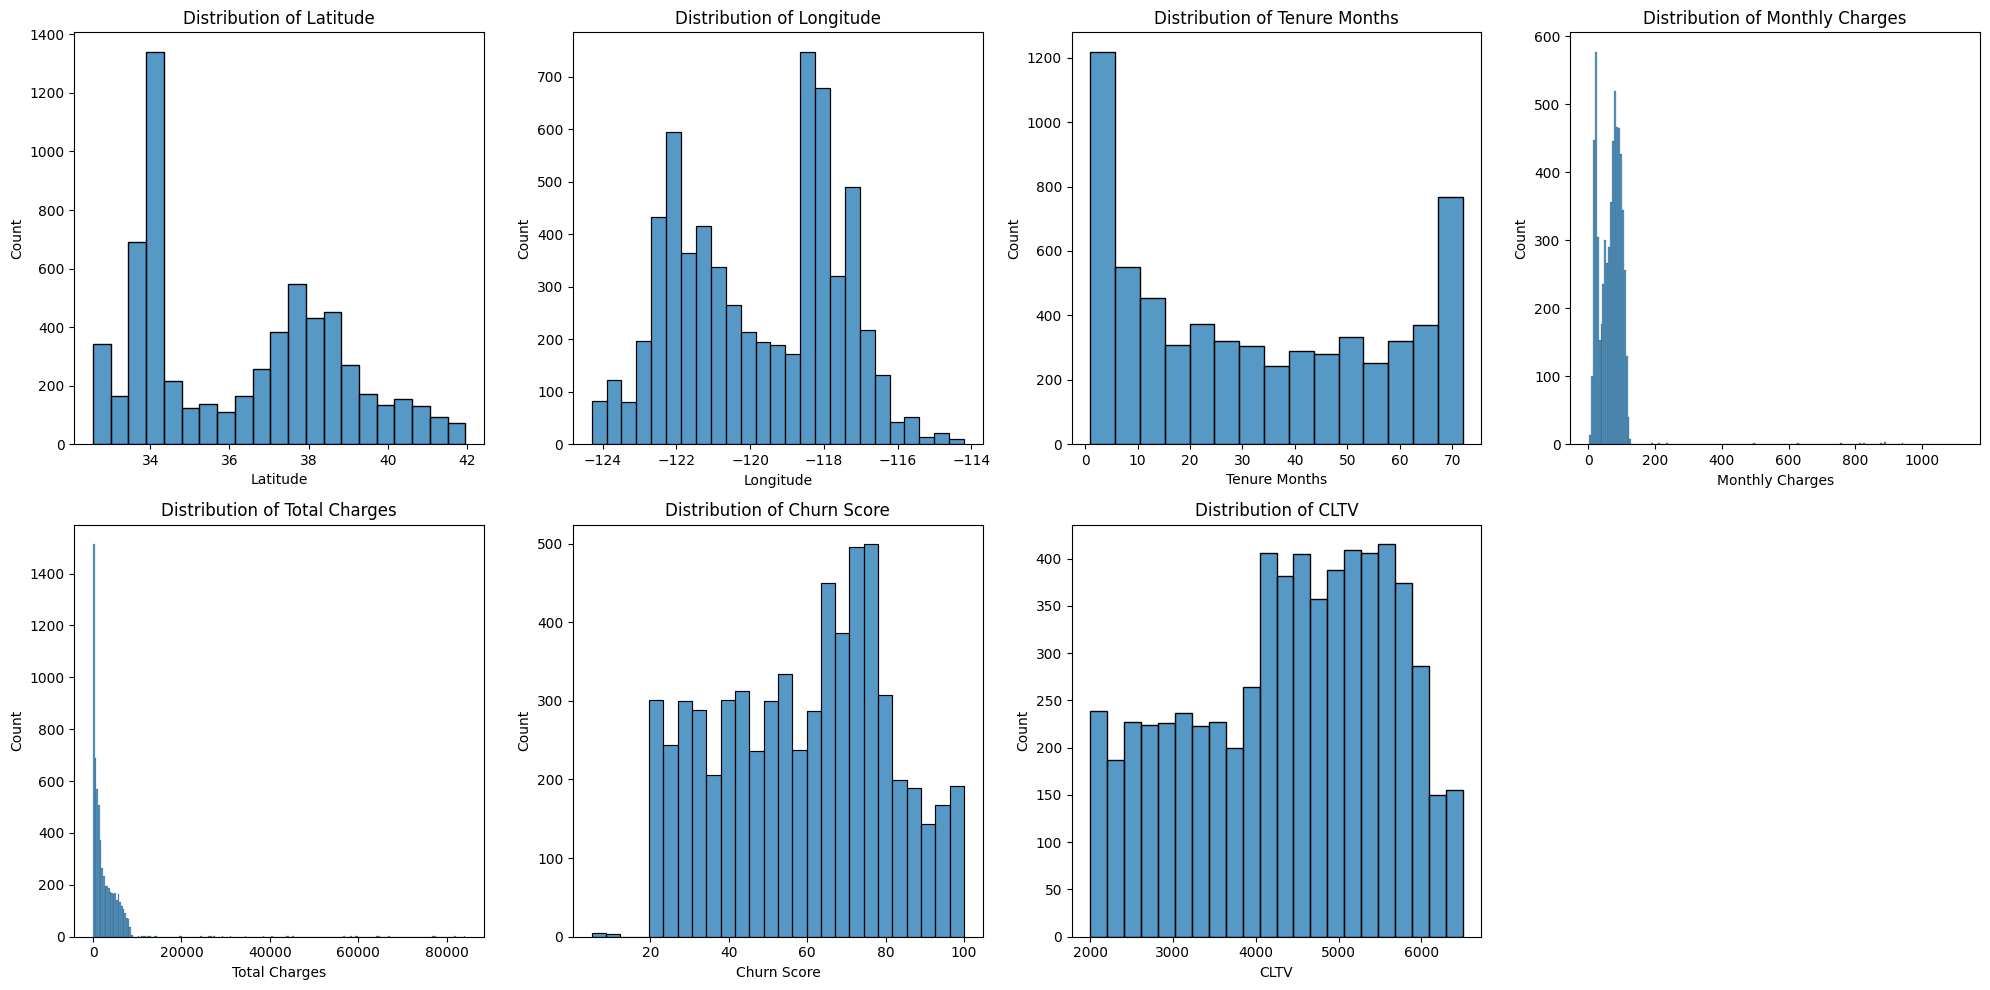

In [ ]:
#Get the list of all numeric columns
num_list = [i for i in df.columns if df[i].dtype != 'object']

num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation from Univariate Analysis: Monthly charges and Total charges are skewed left . Both shows outliers.

Otherwise most columns evenly distributed.

#### Bivariate Analysis

##### Numerical features against target vector
Identify the Feature patterns

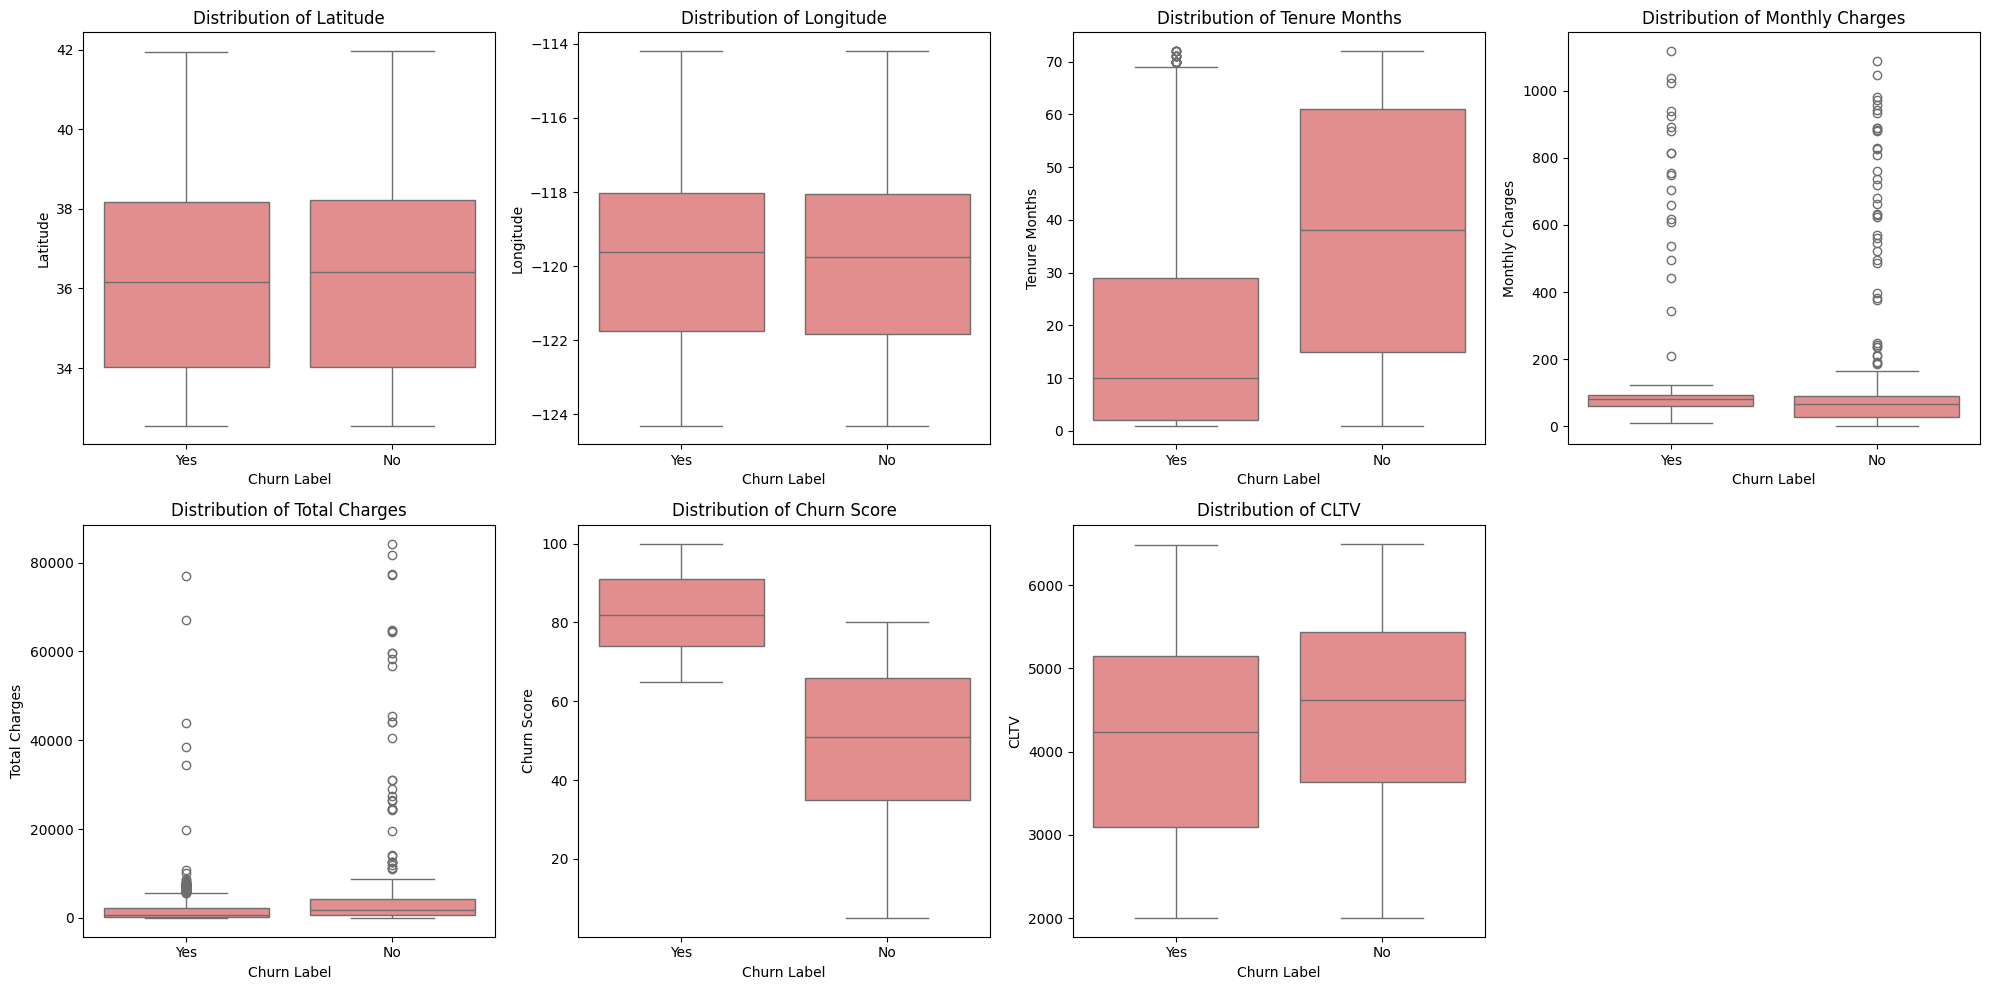

In [ ]:
#Get the list of all numeric columns

# List of numerical columns
num_list = [i for i in df.columns if df[i].dtype != 'object']

# Number of plots
num_plots = len(num_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed for evenly spaced plots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(num_list):
    sns.boxplot(x=df['Churn Label'], y=df[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Numerical features against each other

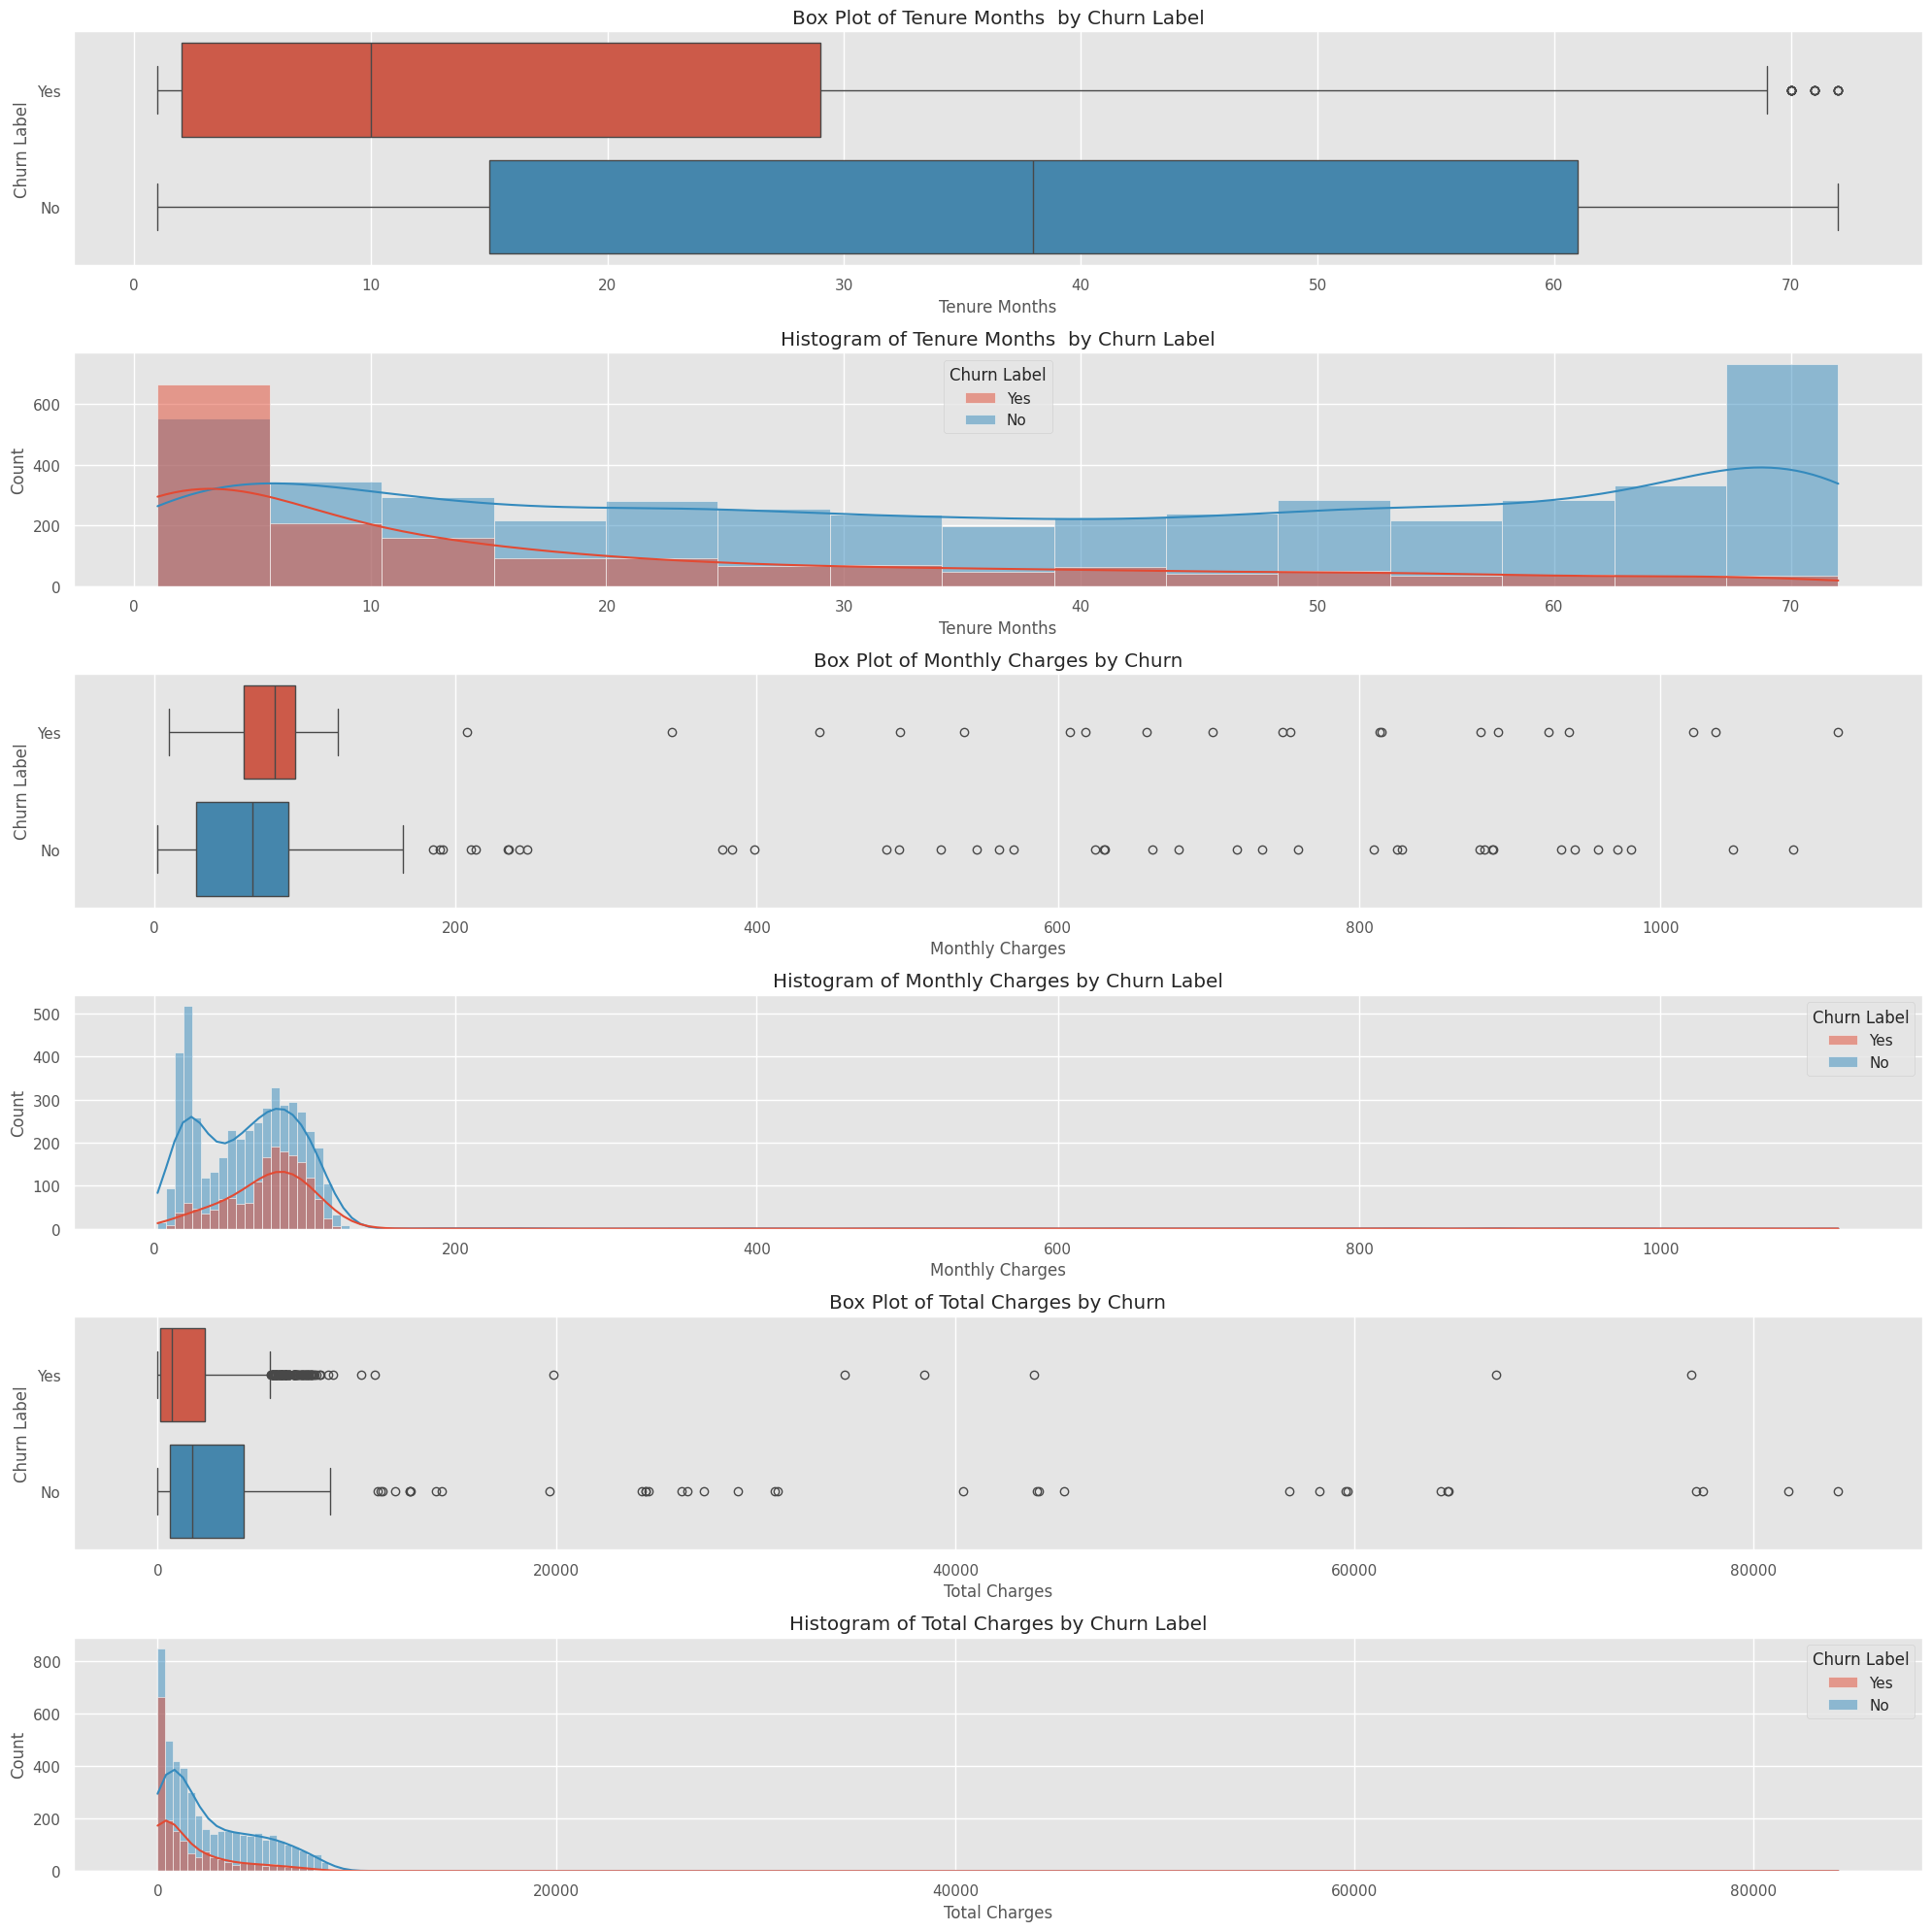

In [ ]:
# Create a swarmplot for the categorical columns in the DataFrame  to anaylse the  distribution of charges and tenure  against Churn Label
# Set the font scale and style
sns.set(font_scale=1)
plt.style.use('ggplot')

# Create subplots
fig, ax = plt.subplots(6,figsize=(20, 20))

#Boxplot for 'Tenure Months' vs 'Churn'
sns.boxplot(data=df, x="Tenure Months", y="Churn Label", ax=ax[0], hue="Churn Label")
ax[0].set_title('Box Plot of Tenure Months  by Churn Label')

# Histogram for 'Tenure Months'
sns.histplot(data=df, x="Tenure Months", ax=ax[1], hue="Churn Label", kde=True)
ax[1].set_title('Histogram of Tenure Months  by Churn Label')

# Boxplot for 'MonthlyCharges' vs 'Churn'
sns.boxplot(data=df, x="Monthly Charges", y="Churn Label", ax=ax[2], hue="Churn Label")
ax[2].set_title('Box Plot of Monthly Charges by Churn')

# Histogram for 'MonthlyCharges'
sns.histplot(data=df, x="Monthly Charges", ax=ax[3], hue="Churn Label", kde=True)
ax[3].set_title('Histogram of Monthly Charges by Churn Label')

# Boxplot for 'TotalCharges' vs 'Churn'
sns.boxplot(data=df, x="Total Charges", y="Churn Label", ax=ax[4], hue="Churn Label")
ax[4].set_title('Box Plot of Total Charges by Churn')

# Histogram for 'TotalCharges'
sns.histplot(data=df, x="Total Charges", ax=ax[5], hue="Churn Label", kde=True)
ax[5].set_title('Histogram of Total Charges by Churn Label')

# Display the plots
plt.tight_layout()
plt.show()

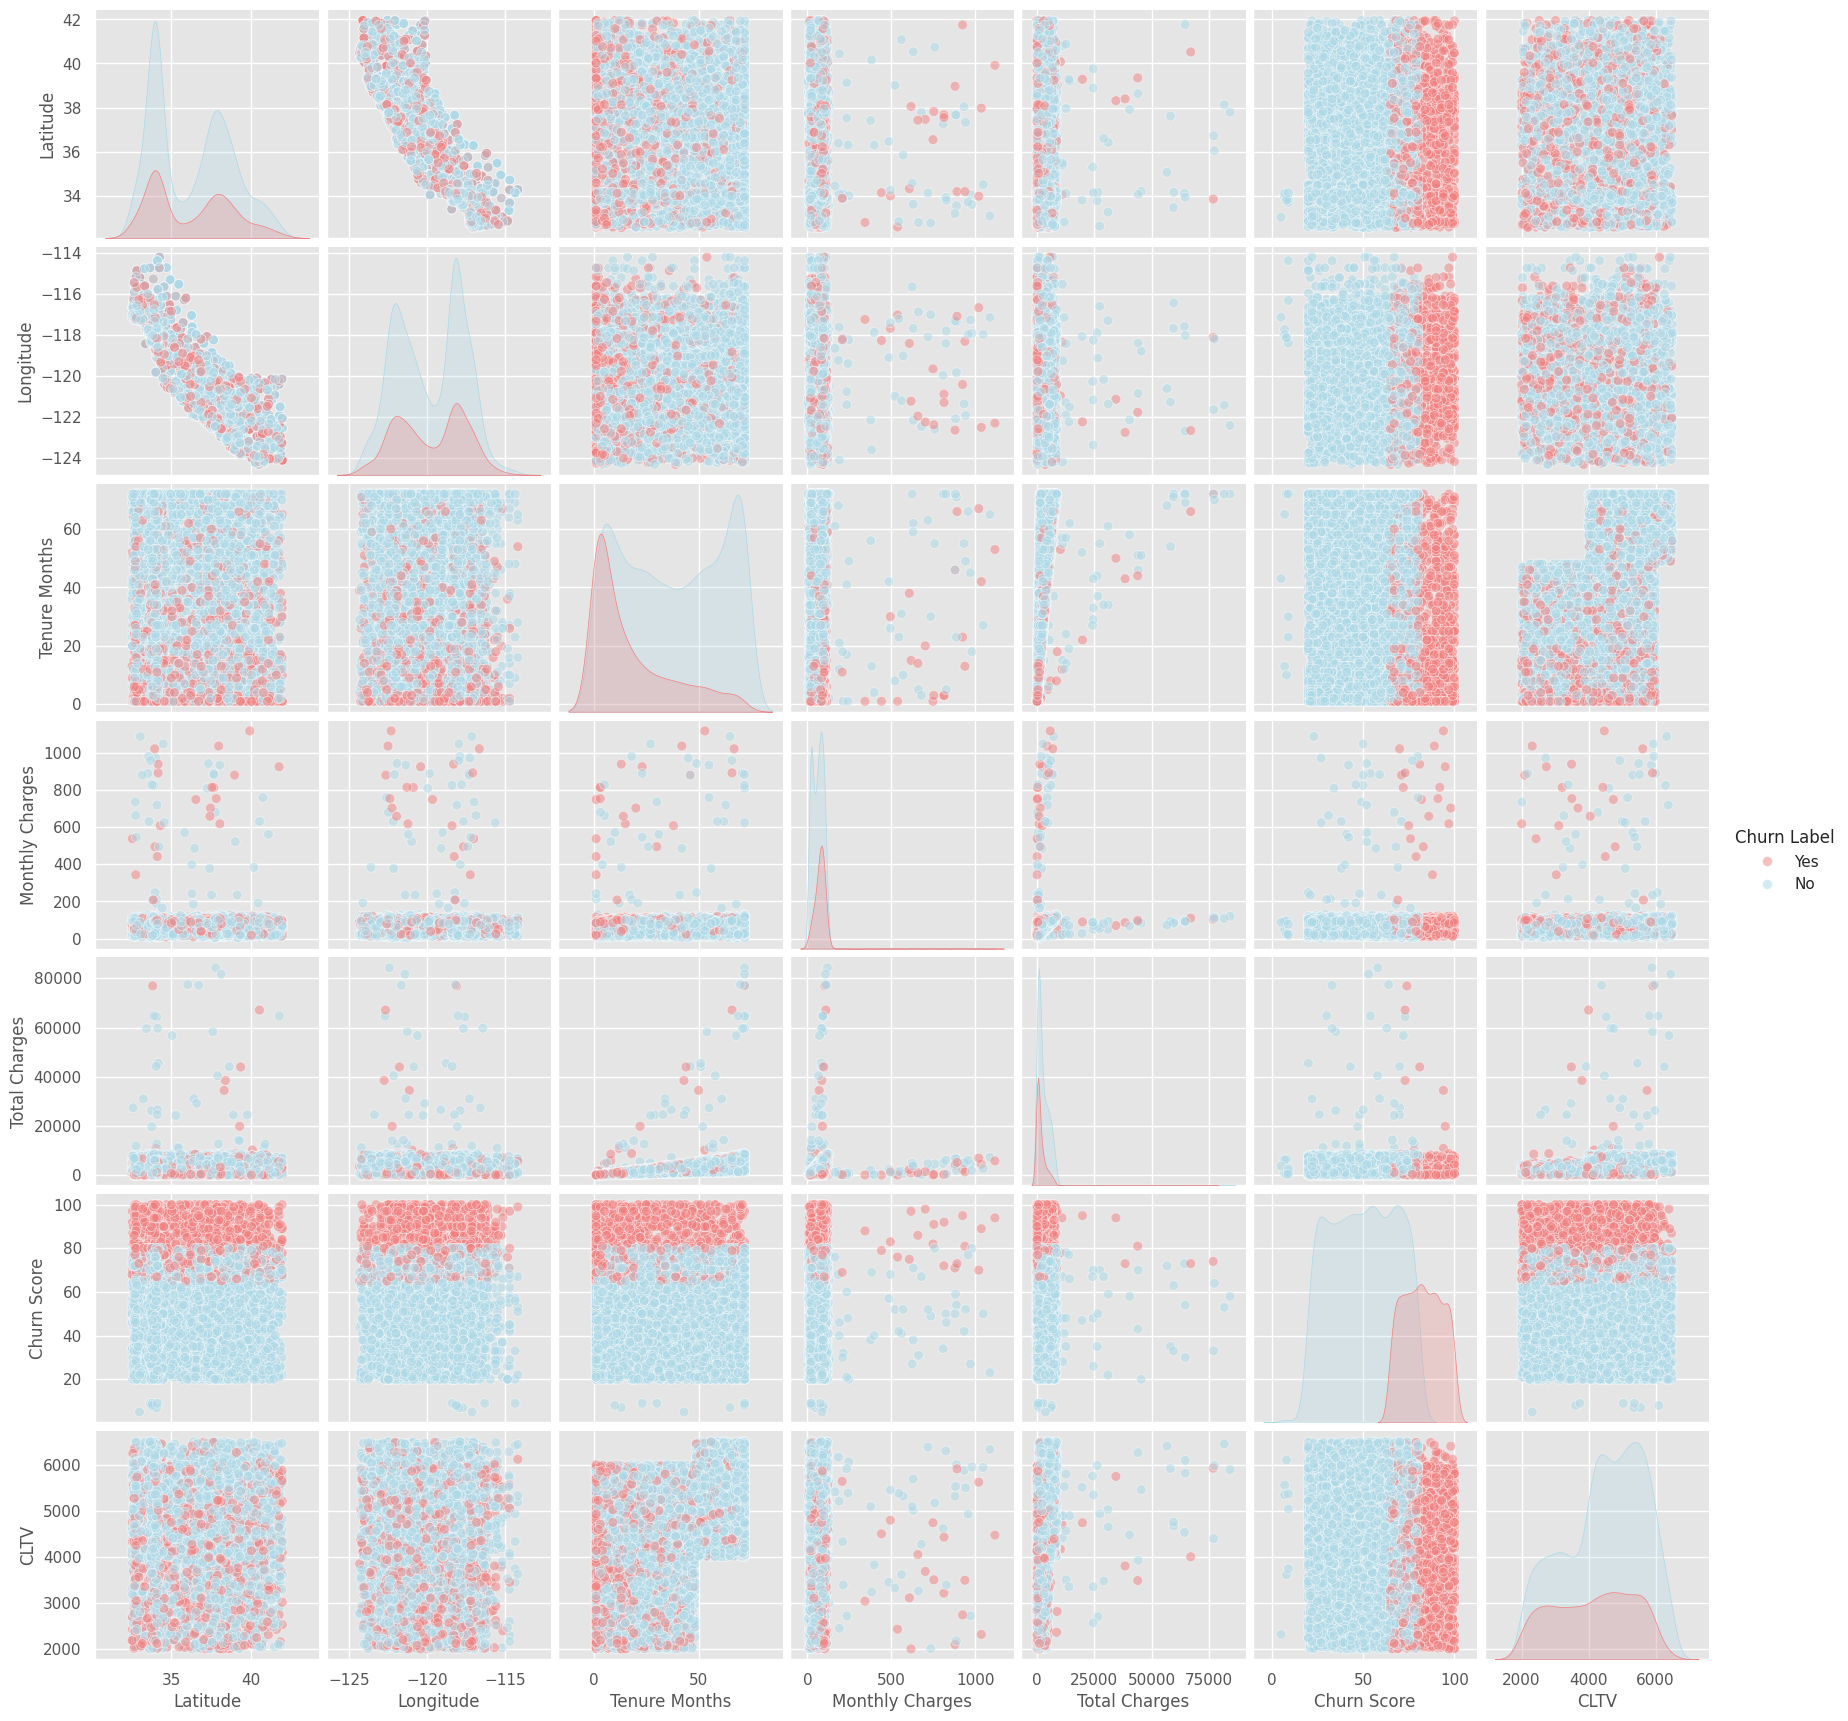

In [ ]:
custom_palette = {
    'Yes': 'lightcoral',
    'No': 'lightblue'
}
sns.pairplot(df[num_list+['Churn Label']],hue='Churn Label',height=2.5,plot_kws={"s":50, "alpha": 0.5},palette=custom_palette)
plt.show()

In [ ]:
# Computes feature correlation  for numeric fields
df_corr = df[num_list].corr(method="pearson")

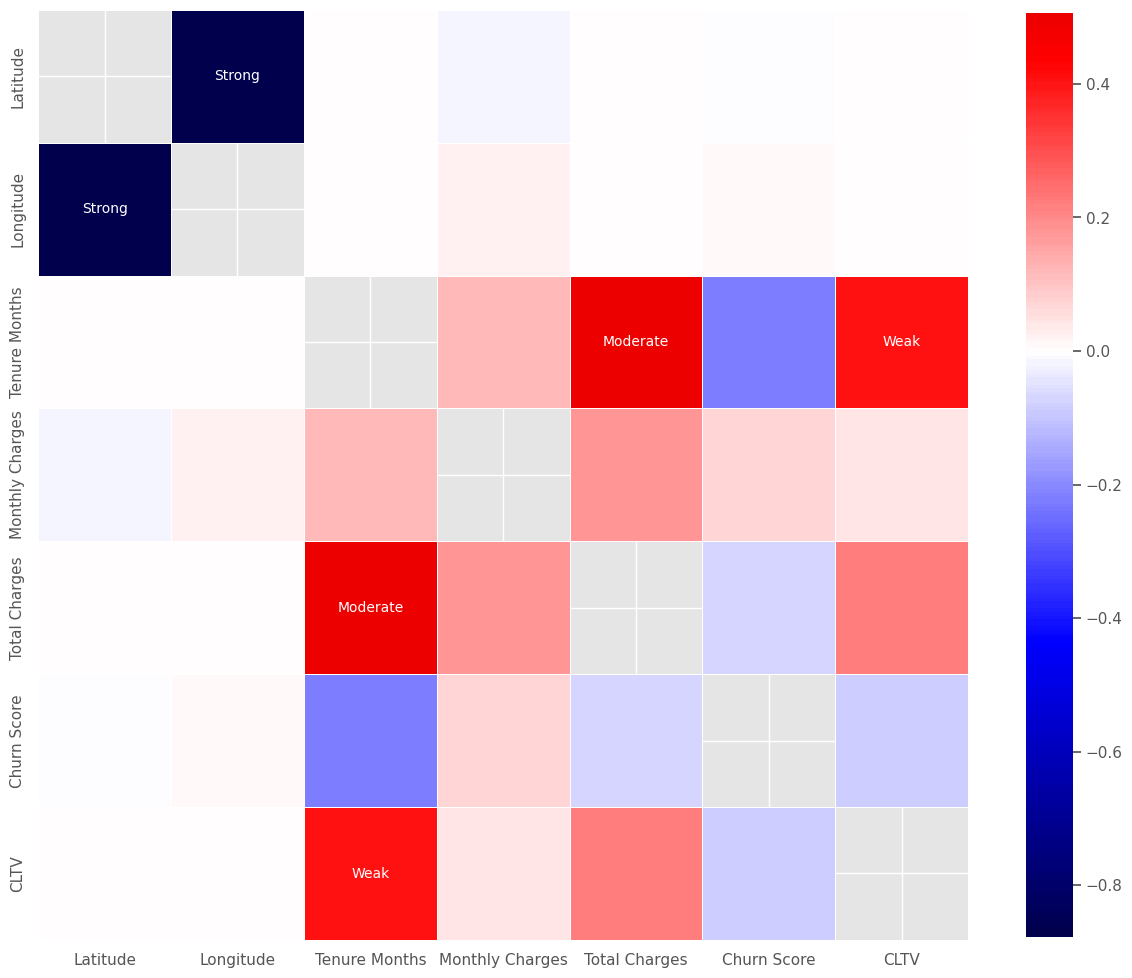

In [ ]:
# Create correlation matrix and  assign Label based on the strength of the correlation - strong, moderate, or weak without having to inspect the actual numerical values.
labels = np.where(np.abs(df_corr)>0.75, "Strong",
                  np.where(np.abs(df_corr)>0.5, "Moderate",
                           np.where(np.abs(df_corr)>0.25, "Weak", "")))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="seismic", cbar_kws={"shrink": 0.8});


As we can see, there is hardly any intercorrelation between variables except for between latitude and longitude. The correlation between latitude and longitude is unconcerning as we know from contexual knowledge that they are independent of one another

##### Bivariate analysis with categorical features

In [ ]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6387 entries, 0 to 75704
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               6387 non-null   object 
 1   Latitude           6387 non-null   float64
 2   Longitude          6387 non-null   float64
 3   Gender             6387 non-null   object 
 4   Senior Citizen     6387 non-null   object 
 5   Partner            6387 non-null   object 
 6   Dependents         6387 non-null   object 
 7   Tenure Months      6387 non-null   int64  
 8   Phone Service      6387 non-null   object 
 9   Multiple Lines     6387 non-null   object 
 10  Internet Service   6387 non-null   object 
 11  Online Security    6387 non-null   object 
 12  Online Backup      6387 non-null   object 
 13  Device Protection  6387 non-null   object 
 14  Tech Support       6387 non-null   object 
 15  Streaming TV       6387 non-null   object 
 16  Streaming Movies   6387 non-

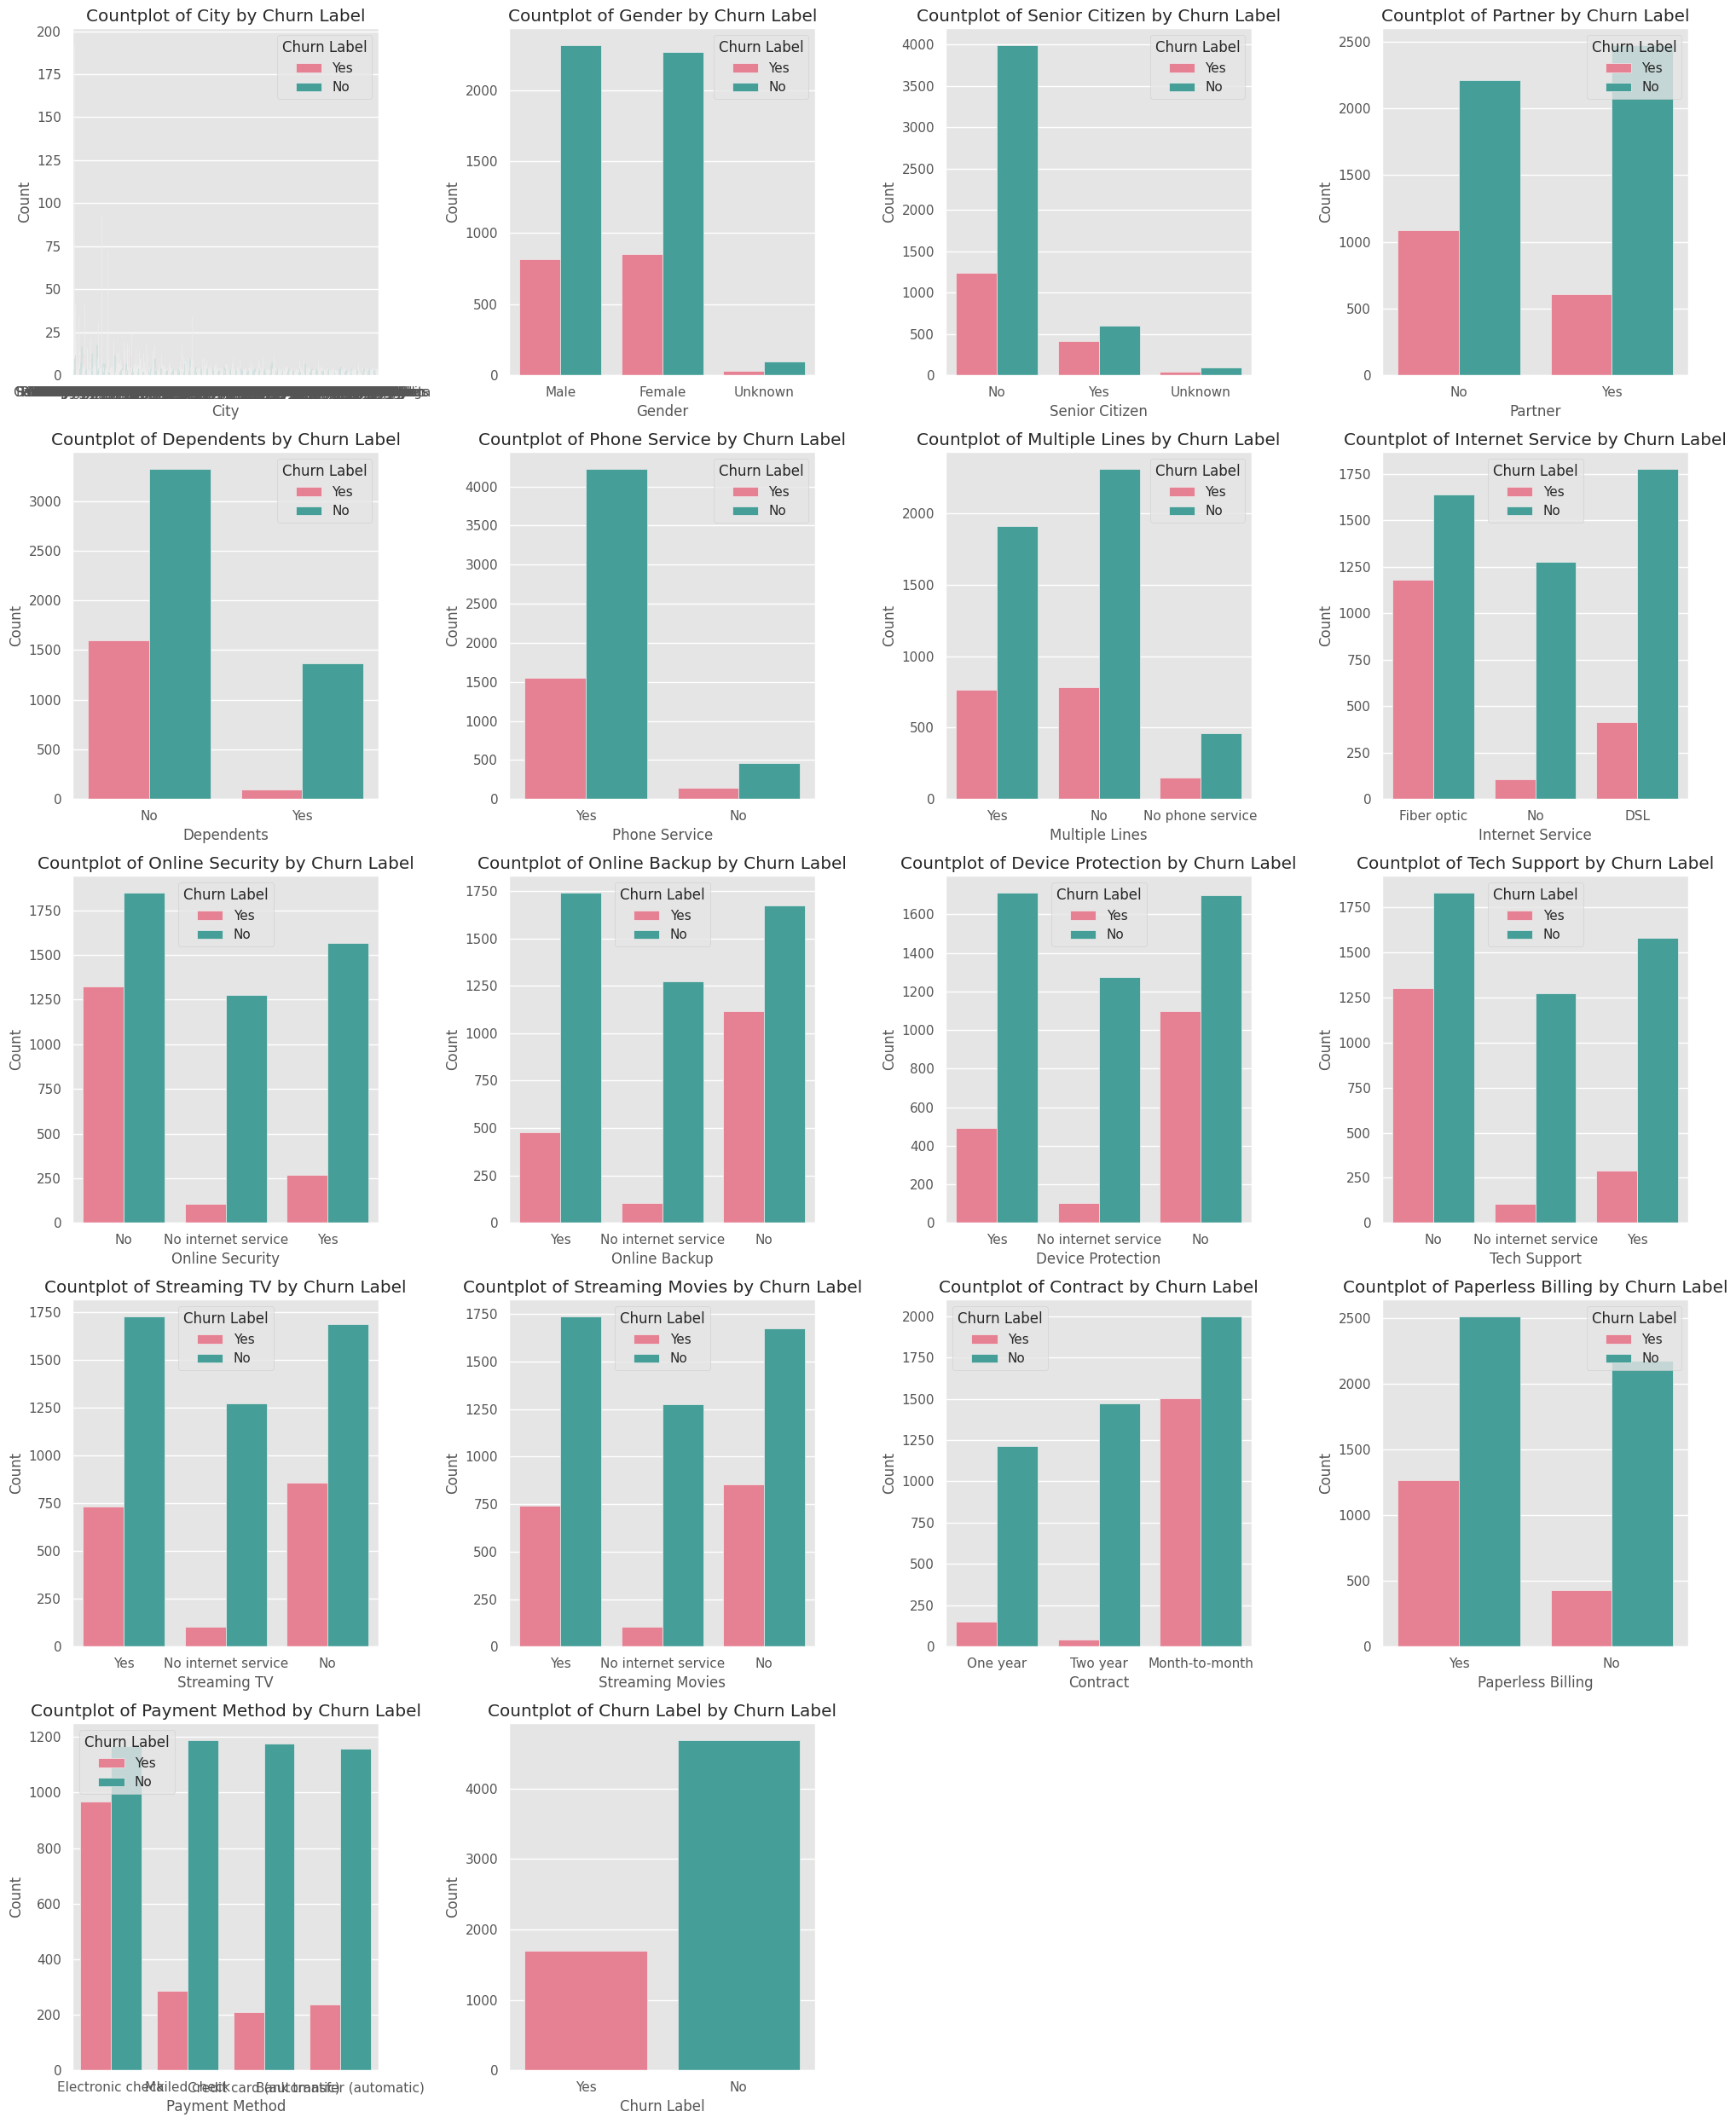

In [ ]:
target_variable = 'Churn Label'

# Number of plots
num_plots = len(cat_list)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot categorical variables against the target variable
for i, col in enumerate(cat_list):
    sns.countplot(x=col, hue=target_variable, data=df, ax=axes[i], palette='husl')
    axes[i].set_title(f'Countplot of {col} by {target_variable}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Heatmap for categorical data

In [ ]:
#import pandas as pd

In [ ]:
# Compute the correlation matrix for categorical fields
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)
df_corr = df_encoded.corr()

# Create labels based on the strength of the correlation
labels = np.where(np.abs(df_corr) > 0.75, "Strong",
                  np.where(np.abs(df_corr) > 0.5, "Moderate",
                           np.where(np.abs(df_corr) > 0.25, "Weak", "")))

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="seismic", cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix with Strength Labels')
plt.show()

KeyboardInterrupt: 

### Inference from Bivariate analysis for Target variable
* Gender  has no impact
* City has no impact
* Payment method ( Electronic Check ) seems to have higher Churn Label
* Customer with internet service ( Fiber optic ) has higher Churn label
* Customer with internet service has higher Churn label
* Senior Citizen - not much corrlation with Churn Label
* Multiple lines - has equal Churn Label and not significant correlation
* Contract  - customer with Month-to-Month population is more and proportionately churn is more.
* Tech Support - This is related to the customer experience and may impact the churn
* Dependents  - There is significant Churn
* Parner    - There is significant Churn
* Online Security - when 'No' , there is more Churn . This could be Telco service related
* Online Backup -This is simillar to Online Security

Bivariable analysis provided additional to dig into the detailed analysis of distribution of data -for sepcific selected set of features - which have Binary values  ( yes/No ).  I have created the visualization below .

Verify distribution of data with charges against the Target feature - Churn
* Phone Service
* Multiple Lines
* Internet Service
* Online Security
* Contract
* Tech Support
* Streaming TV
* Streaming Movies
* Payment Method

In [ ]:
# Specify features of interest
selected_features = ["Phone Service", "Multiple Lines", "Internet Service",
                     "Online Security", "Contract","Tech Support", "Streaming TV", "Streaming Movies","Payment Method"]

In [ ]:
# check density of distribution of the data against the target variable.
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
# Loop through these features and plot entries from each feature against `Total Charges`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Total Charges"],palette="colorblind",
                   split=True, hue="Churn Label",ax=ax)
plt.tight_layout();

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 8))

# Loop through these features and plot entries from each feature against `Monthly Charges`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Monthly Charges"], palette="Set3",
                   split=True, hue="Churn Label", ax=ax)
plt.tight_layout();

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 8))

# Loop through these features and plot entries from each feature against `Tech Support`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Tech Support"], palette="Set2",
                   split=True, hue="Churn Label", ax=ax)
    plt.tight_layout();

Facet Grid: Provides separate plots for different categories.
Observe the spead of data values for all the selected features using Facet Grid

In [ ]:
# Facet Grid to plot 'Churn Label' across different 'Streaming Movies'
g = sns.FacetGrid(df, col='Churn Label', height=4, aspect=1)
g.map(sns.histplot, 'Streaming Movies', bins=10, alpha=0.7)
plt.show()

In [ ]:
#Analyse with Target variable, what is the percenatge  of feature  with Churn or No churn
import matplotlib.pyplot as plt

# Number of plots
num_plots = len(selected_features)
cols = 3
rows = (num_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), sharex=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Aggregate data
    pivot_table = df.pivot_table(index=feature, columns='Churn Label', aggfunc='size', fill_value=0)

    # Convert counts to percentages
    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    # Reverse the order of the rows
    pivot_table_percentage = pivot_table_percentage[::-1]

    # Plotting percentages
    ax = axes[i]
    pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, color=['green', 'salmon', 'skyblue'], legend=True)

    # Annotate bars with percentage values
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                # Positioning text at the center of each bar segment
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                        f'{height:.1f}%',
                        ha='center', va='center', color='white',weight='bold',fontsize=10)

    # Add titles and labels
    ax.set_title(f'Percentage of {feature} by Churn Label')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')

# Remove empty subplots if any
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

# Show the plot with tight layout
plt.tight_layout()
plt.legend(title='Churn Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Feature Engineering
Feature scaling in machine learning is a preprocessing step that normalizes data, ensuring all features contribute equally by converting them to a common scale, improving algorithm performance and convergence

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Check Skewness of data
numerical_skewness = df.select_dtypes(include=['number']).skew()
print(numerical_skewness)

### Data Transformation

##### Feature scaling in machine learning is a preprocessing step that normalizes data, ensuring all features contribute equally by converting them to a common scale, improving algorithm performance and convergence

### One Hot Encoding

In [ ]:
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

# Perform stratified train-test split to maintain class balance in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Keep copy of X_test for early modelling checks
X_test_copy = X_test

In [ ]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# Fit encoder on the training data and transform both train and test sets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Drop original categorical columns and append the encoded ones
X_train = np.hstack((X_train.drop(columns=categorical_features), X_train_encoded))
X_test = np.hstack((X_test.drop(columns=categorical_features), X_test_encoded))


In [ ]:
# Check the correlation Matrix again after oneHotEncoding
df_corr = pd.DataFrame(X_train)
df_corr = df_corr.corr()
# Create labels based on the strength of the correlation
labels = np.where(np.abs(df_corr)>0.75, "Strong",
                  np.where(np.abs(df_corr)>0.5, "Moderate",
                           np.where(np.abs(df_corr)>0.25, "Weak", "")))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="seismic", cbar_kws={"shrink": 0.8});


### Feature Scaling

##### Feature scaling in machine learning is a preprocessing step that normalizes data, ensuring all features contribute equally by converting them to a common scale, improving algorithm performance and convergence

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#ML Modelling  and Performance Evaluation Metrics and Error Analysis

In [ ]:
from tabulate import tabulate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, roc_curve
from sklearn.datasets import load_iris

### Model-1 KNN Classifier

#### Model Execution

In [ ]:
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean']}

# Use StratifiedKFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_knn = grid_search.best_estimator_

In [ ]:
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Model Evaluation Metrics

In [ ]:
y_prob = best_knn.predict_proba(X_test_scaled)  # Class probabilities

# Convert OneHotEncoded columns back to original categories for inspection
X_test_raw = X_test_copy  # Assuming you kept a copy of X_test before encoding/scaling
X_test_raw = pd.DataFrame(X_test_raw)

encoded_columns = encoder.get_feature_names_out(categorical_features)
feature_names = np.append(X.columns.drop(categorical_features), encoded_columns)

# Convert the NumPy array back to a DataFrame with appropriate column names
X_test_with_prob = pd.DataFrame(X_test_raw)
X_test_with_prob['predicted_class'] = y_pred
X_test_with_prob['actual_class'] = y_test.values

# Assuming binary classification (two classes), extract the probability of the positive class (class 1)
X_test_with_prob['positive_class_prob'] = y_prob[:, 1]

# Sort by the probability of the positive class
X_test_with_prob_sorted = X_test_with_prob.sort_values(by='positive_class_prob', ascending=False)

In [ ]:
df2 = X_test_with_prob_sorted

In [ ]:
# Below is to save the predicted and actual value for analysis
df2 = df2[df2['predicted_class'] != df2['actual_class']]

#### Model Error Analysis

In [ ]:
df2.head(10)

In [ ]:
df_FP = df2[df2['predicted_class'] == 'Yes']
df_FN = df2[df2['predicted_class'] == 'No']

In [ ]:
#False Nagatives
df_FN.head()

In [ ]:
df_FP.describe(exclude = 'number')

In [ ]:
df_FN.describe(exclude = 'number')

Analysis of False Negatives

So far, from the modelling stage, it appears that false negatives are evenly divided amongst the classes, with the frequency of the top class being roughly even compared to the other classes

In [ ]:
# Calculate metrics for the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot confusion matrix
#plt.figure(figsize=(10, 7))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
# plt.title('Confusion Matrix')
#plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_knn.predict_proba(X_test_scaled)[:, 1], pos_label='Yes')
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Model-2 Random Forest Classfier

- using random forest as it is an ensemble method:
  - more robust, resitant to outliers
  - usually better performance and generalisation than individual estimators like decision tree, less likely to overfit

- 5-fold cross-validation using gridsearchcv to make tuning of hyperparameters more reliable

- fi-score scoring to balance both precision and recall when finetuning dataset


Out-of-Bag (OOB) Score
Bootstrap Sampling: Random Forest uses bootstrap sampling, where each tree in the forest is trained on a random subset of the data. Some samples are left out in this process, and these are called Out-of-Bag samples.
OOB Score: The OOB score is an internal cross-validation method. It uses the OOB samples to test the model’s performance. Essentially, each tree is tested on the samples that were not used to train it, providing an unbiased estimate of the model’s performance.


#### Model Execution

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline

# Example data preparation (replace with your actual data)
# X and y should be your feature matrix and labels respectively
# X_train_scaled, y_train = ...


# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__oob_score': [True]  # Ensure OOB score is enabled
}

# Create a pipeline with a RandomForestClassifier
pipeline = Pipeline([
    ('randomforestclassifier', RandomForestClassifier())
])

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',  # Changed scoring to 'f1' for better balance of precision and recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2  # Print progress messages
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class


#### Model Evaluation Metrics

In [ ]:
# Evaluation metrics for  RandomForestClassifier
print("Best parameters found:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

# Access the OOB score from the best model
oob_score = best_model.named_steps['randomforestclassifier'].oob_score_
print(f"OOB Score: {oob_score}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred,pos_label='Yes')
print("Precision:", precision)

# Recall

#recall = recall_score(y_test, y_pred)
#print("Recall:", recall)

print("NaN values in y_test:", pd.isnull(y_test).sum())
print("NaN values in y_pred:", pd.isnull(y_pred).sum())

# Calculate recall if everything looks good
if y_test.shape == y_pred.shape and not pd.isnull(y_test).any() and not pd.isnull(y_pred).any():
    recall = recall_score(y_test, y_pred,pos_label="Yes")
    print("Recall:", recall)
else:
    print("There is an issue with the input arrays.")


# F1 Score
f1 = f1_score(y_test, y_pred,pos_label="Yes")
print("F1 Score:", f1)

# Out-of-Bag Error
oob_score = 1 - best_model.named_steps['randomforestclassifier'].oob_score_
print(f"OOB Error: {oob_score}")
#oob_error = 1 - grid_search.oob_score_
#print(f"OOB Error: {oob_error}")

In [ ]:
#import pandas as pd

In [ ]:
# After Model execution , check correlation matrix
# Create a DataFrame with actual and predicted values

df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Compute the correlation matrix
df_corr = df_results.corr()

# Create labels based on the strength of the correlation
labels = np.where(np.abs(df_corr) > 0.75, "Strong",
                  np.where(np.abs(df_corr) > 0.5, "Moderate",
                           np.where(np.abs(df_corr) > 0.25, "Weak", "")))

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=labels, fmt='', cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title('Post-Model Correlation Matrix with Strength Labels')
plt.show()


# Feature Importance
feature_importances = grid_search.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({feature_importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

# Permutation Feature Importance
perm_importance = permutation_importance(grid_search, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

# Partial Dependence Plots
features = [0, 1]  # Example feature indices
plot_partial_dependence(grid_search, X_train_scaled, features, grid_resolution=50)
plt.show()

## Model-3   XGBoost
GBoost stands for eXtreme Gradient Boosting. It’s an efficient and scalable implementation of gradient boosting framework.  XGBoost is known for its performance and speed and used for regression, classification, ranking, and user-defined prediction problems.
how XGBoost works:

For knowledge and info :
Gradient Boosting: XGBoost is based on the principle of gradient boosting, where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction.
Tree-based Models: It primarily uses decision trees as base learners. These are combined in an ensemble to improve the model’s accuracy.
Regularization: XGBoost includes regularization terms in its objective function to prevent overfitting, which is why it’s called “extreme.”
Parallel Processing: It utilizes parallel processing and is optimized for speed and performance, which allows it to run quickly on large datasets.
Handling Missing Values: XGBoost can handle missing data in the input.
Flexibility: It allows users to define custom optimization objectives and evaluation criteria, adding a layer of flexibility to the model.
Cross-validation: XGBoost has an in-built routine to perform cross-validation at each iteration of the boosting process.

#### Model Execution

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='gpu_hist'  # Use GPU for histogram-based training
)

# Define the parameter grid
param_grid = {
    'objective': ['binary:logistic'],  # or 'binary:logitraw' depending on your version
    'booster': ['gbtree', 'dart'],  # gblinear does not support GPU acceleration
    'max_depth': [3, 4],  # Reduced depth
    'learning_rate': [0.1, 0.2],  # Increased learning rate
    'n_estimators': [50, 100],  # Reduced number of estimators
    'subsample': [0.8],  # Reduced subsample
    'colsample_bytree': [0.8],  # Reduced column sampling
    'gamma': [0, 0.1],  # Reduced gamma
    'rate_drop': [0],  # Only for dart booster
    'skip_drop': [0]  # Only for dart booster
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # You can use other metrics like 'f1', 'roc_auc', etc.
    cv=5,                # Number of cross-validation folds
    verbose=2,
    n_jobs=-1            # Use all available cores
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)


#### Model Evaluation Metrics

In [ ]:
#Evaluation metrics
# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.2f}")

# Optional: Feature Importance
best_model = grid_search.best_estimator_
#xgb.plot_importance(best_model)

plt.figure(figsize=(12, 8))
xgb.plot_importance(best_model, importance_type='weight', title='Feature Importance', xlabel='Feature Importance', ylabel='Features')
plt.show()